# Task 4 - EDA 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pdp
import sys
sys.path.append('../../Scripts')
from MS2_CleanRawData import *

## *Amenities*

In [15]:
AmenitiesData = load_clean_Ammenities("/Users/emmarutledge/Desktop/DATA301/course-project-group_1036/data/raw/google_review_ratings.csv")

In [29]:
AmenitiesData.describe()

,Churches,Parks,Malls,Local Services,Hotels & Lodgings,Gyms
count,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000
mean,1.541881,2.796618,3.314854,2.465097,2.126362,0.999344
std,0.854111,1.317547,1.442907,1.329559,1.439211,0.941138
min,0.500000,0.830000,1.120000,0.780000,0.770000,0.500000
25%,0.910000,1.740000,1.900000,1.550000,1.100000,0.600000
50%,1.320000,2.440000,3.220000,1.990000,1.600000,0.740000
75%,2.030000,4.120000,5.000000,2.890000,2.390000,0.880000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


*This description of the Amenities Dataframe shows that malls in europe have the highest overall rating,  with a minimum rating of 1.12 stars, and a maximum rating of 5 stars. It is also shown that there were 4285 ratings recorded*

## Box and Whisker Plot of Google Reviews Distribution for Amenities

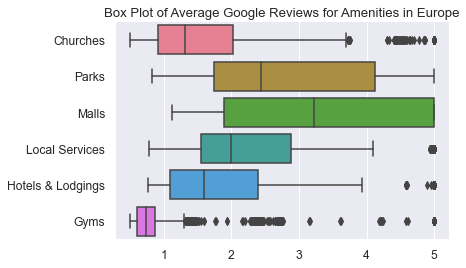

In [17]:
sns.set_style("ticks")
sns.set(font_scale = 1.1)
Box_Plot_Amenities = sns.boxplot(data = AmenitiesData, orient = "h", palette = "husl")
plt.title("Box Plot of Average Google Reviews for Amenities in Europe")
sns.despine()

*This plot provides a visual of the distribution of each amenity category. It is clear that malls have the leading reviews, and gyms have the worst. Based on this plot, you could gain a general idea of what places are worth visiting in Europe.*

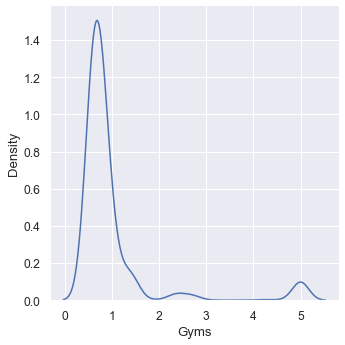

In [18]:
sns.displot(data=AmenitiesData,
              x='Gyms',
             kind='kde')

*This line graph is displaying the most poorly rated amenity in europe; the gyms. There is a prominent spike showing the most common review being less than 1/5 stars.*

## *Food*

In [19]:
FoodData = load_clean_Food_and_Beverage('/Users/emmarutledge/Desktop/DATA301/course-project-group_1036/data/raw/google_review_ratings.csv')
FoodData.head()

,Google User ID,Restaurants,Pubs & Bars,Burger & Pizza Shops,Juice Bars,Bakeries,Cafes
65,User 66,2.84,2.41,1.37,1.34,0.50,0.52
66,User 67,2.84,2.42,1.39,1.33,0.50,0.51
67,User 68,2.83,2.41,1.46,1.32,0.50,0.51
68,User 69,2.82,2.83,1.46,1.31,0.53,0.75
69,User 70,2.82,2.41,1.46,1.30,0.52,0.52


In [20]:
FoodData.describe()

,Restaurants,Pubs & Bars,Burger & Pizza Shops,Juice Bars,Bakeries,Cafes
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000
mean,3.054909,2.623560,2.019657,2.148252,1.170509,1.121028
std,1.402309,1.269768,1.218255,1.597985,1.197777,0.944740
min,0.840000,0.810000,0.780000,0.760000,0.500000,0.500000
25%,1.690000,1.560000,1.180000,0.980000,0.600000,0.670000
50%,2.780000,2.530000,1.680000,1.380000,0.750000,0.810000
75%,5.000000,3.160000,2.230000,2.685000,0.890000,1.060000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


*Here, we can see that there are 4143 ratings of each type of facilty
we can also see that every place has a maximum rating of 5 stars, and a minimum rating varying between 0.5, and 0.84 stars.*

In [21]:
MeanRestaurantRating = FoodData["Restaurants"].mean()
MeanPubBarRating = FoodData["Pubs & Bars"].mean()
MeanBurgerPizzaRating = FoodData["Burger & Pizza Shops"].mean()
MeanJuiceRating = FoodData["Juice Bars"].mean()
MeanBakeriesRating = FoodData["Bakeries"].mean()
MeanCafesRating = FoodData["Cafes"].mean()

MeanFoodRating = (MeanRestaurantRating, MeanPubBarRating, MeanBurgerPizzaRating, MeanJuiceRating, MeanBakeriesRating, MeanCafesRating)
MeanFoodRating

(3.054909485879797,
 2.6235602220613083,
 2.019657253198165,
 2.1482524740526188,
 1.1705092927830074,
 1.1210282404055032)

In [22]:
d = {'Places': ['Restaurant', 'Pubs & Bars', 'Burgers & Pizza', 'Juice Bars', 'Bakeries', 'Cafes'],
     'Mean Rating': [3.054909485879797,2.6235602220613083,2.019657253198165, 2.1482524740526188, 1.1705092927830074, 1.1210282404055032]}
MeanRatingsDf = pd.DataFrame(data=d)
MeanRatingsDf

,Places,Mean Rating
0,Restaurant,3.054909
1,Pubs & Bars,2.623560
2,Burgers & Pizza,2.019657
3,Juice Bars,2.148252
4,Bakeries,1.170509
5,Cafes,1.121028


## Mean Ratings for Each Food and Beverage Category

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Restaurant'),
  Text(1, 0, 'Pubs & Bars'),
  Text(2, 0, 'Burgers & Pizza'),
  Text(3, 0, 'Juice Bars'),
  Text(4, 0, 'Bakeries'),
  Text(5, 0, 'Cafes')])

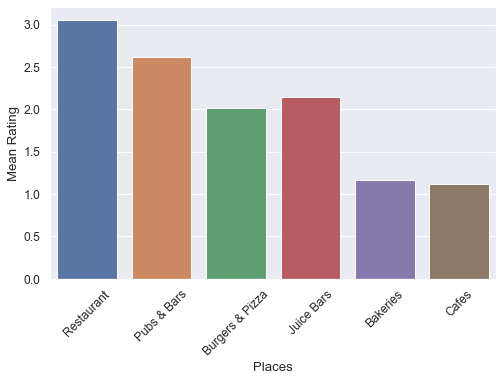

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.barplot(data= MeanRatingsDf,
            x='Places',
            y='Mean Rating')
plt.xticks(rotation=45)

*This barplot shows the average rating for each type of Food and Beverage Facility. For someone who is travelling, this would give them an idea of what type place is most worth eating at. Restaurants attain the highest rating, and Cafes achieve the lowest.*

In [24]:
Restaurants = FoodData['Restaurants']

## Histogram of Restaurant Ratings Distribution

(array([ 104.,  912.,  377.,  298.,  711.,  311.,  106.,   45.,   90.,
        1189.]),
 array([0.84 , 1.256, 1.672, 2.088, 2.504, 2.92 , 3.336, 3.752, 4.168,
        4.584, 5.   ]),
 <BarContainer object of 10 artists>)

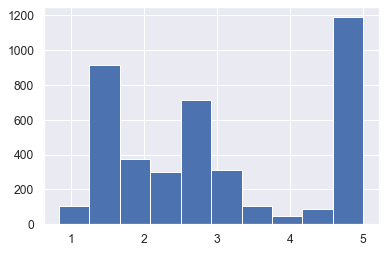

In [25]:
counts, bins = np.histogram(Restaurants)
plt.hist(bins[:-1], bins, weights=counts)

*This histogram represents the distribution of ratings for Restaurants, which is the highest rated food estabilshment based on the google reviews for Europe. This visualization breaks down the data into a way where it is easy to see that the customers either love it or hate it since the histogram peaks in a few different locations.*